# Import Libraries and Read Dataset

In [510]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings # hides warning messages
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [511]:
data = pd.read_csv("Data_default_and_economics_3.csv") # Merged Dataset
data.drop(data.filter(regex="Unname"),axis=1, inplace=True) # Drop 'Unname' column from dataset
data.head()

,Country_Name,Country_code,Year,default_flag,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP
0,Afghanistan,AFG,1982,0,2.892346,12.3790,8.3500,-1.9000,13.6230,12.2330,1.184862,-2.031,174.236,-4.7325,-1.295321
1,Afghanistan,AFG,1983,0,2.955046,12.0890,3.2235,2.0740,13.6230,13.7295,1.275887,-3.181,174.236,-5.9035,-1.340026
2,Afghanistan,AFG,1984,0,2.904777,12.4555,0.9340,-0.6000,14.3115,17.8350,1.333387,-1.490,174.236,-5.4585,-1.369093
3,Afghanistan,AFG,1985,0,2.897701,9.8775,-2.7000,1.9870,13.9545,16.5930,1.383322,-0.873,174.236,-4.4945,-1.360655
4,Afghanistan,AFG,1986,0,2.841643,10.2650,-1.3370,3.2095,13.7180,17.6000,1.370402,-2.559,174.236,-3.0125,-1.378554


# EDA

In [512]:
data.isnull().sum() # Dataset has been cleaned of null values

Country_Name                           0
Country_code                           0
Year                                   0
default_flag                           0
log_gdp_per_capita                     0
annual_inflation                       0
change_in_volume_of_imports            0
change_in_volume_of_exports            0
unemployment_rate                      0
gov_revenue_per_GDP                    0
log_gov_expenditure_per_GDP            0
gov_lending_minus_borrowing_per_GDP    0
gov_net_debt_per_GDP                   0
exports_minus_imports_per_GDP          0
log10_share_world_GDP                  0
dtype: int64

In [513]:
data.describe().transpose() # Preference to transpose rows and columns
#data.describe()

,count,mean,std,min,25%,50%,75%,max
Year,8268.0,2001.000000,11.255309,1982.000000,1991.000000,2001.000000,2011.000000,2020.000000
default_flag,8268.0,0.077044,0.266677,0.000000,0.000000,0.000000,0.000000,1.000000
log_gdp_per_capita,8268.0,3.480255,0.637257,1.233402,2.963987,3.445162,3.972542,5.080806
annual_inflation,8268.0,32.462818,769.738299,-72.729000,2.407000,5.131500,9.994500,65374.080000
change_in_volume_of_imports,8268.0,5.561244,15.395268,-82.872000,-0.261250,5.093000,10.227250,441.870000
change_in_volume_of_exports,8268.0,5.473762,17.362154,-90.597000,0.359000,4.876000,9.123250,649.151000
unemployment_rate,8268.0,9.457230,4.902110,0.025000,5.942000,8.998500,12.900000,70.000000
gov_revenue_per_GDP,8268.0,27.643017,12.853580,0.036000,18.547500,23.767500,37.200000,164.054000
log_gov_expenditure_per_GDP,8268.0,1.453785,0.176583,0.549616,1.339511,1.435876,1.598501,2.774349
gov_lending_minus_borrowing_per_GDP,8268.0,-0.600026,11.080305,-549.840000,-2.014500,-0.667000,1.236000,126.464000


In [514]:
data.corr() #Correlation matrix. Heatmap of correlated features is shown below

,Year,default_flag,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP
Year,1.000000,-0.188283,0.297968,-0.001958,0.026970,0.002625,-0.068411,0.151510,0.051196,0.015844,-0.415931,0.009642,-0.010982
default_flag,-0.188283,1.000000,-0.199409,0.006923,-0.041335,-0.013628,0.158196,-0.135350,-0.100115,-0.026297,0.180403,-0.059894,-0.036312
log_gdp_per_capita,0.297968,-0.199409,1.000000,-0.020523,-0.017617,-0.038569,-0.253364,0.483531,0.421507,0.085150,-0.277388,0.261920,0.484858
annual_inflation,-0.001958,0.006923,-0.020523,1.000000,-0.006371,-0.022678,0.058486,-0.018265,0.009616,-0.027437,-0.001388,-0.001608,-0.002060
change_in_volume_of_imports,0.026970,-0.041335,-0.017617,-0.006371,1.000000,0.366295,-0.046959,-0.000908,-0.042871,0.017953,-0.012344,-0.052131,0.019809
change_in_volume_of_exports,0.002625,-0.013628,-0.038569,-0.022678,0.366295,1.000000,-0.004445,-0.022921,-0.032716,-0.017014,-0.003625,0.023622,0.010968
unemployment_rate,-0.068411,0.158196,-0.253364,0.058486,-0.046959,-0.004445,1.000000,-0.178556,-0.111421,-0.060792,0.349649,-0.127896,-0.170235
gov_revenue_per_GDP,0.151510,-0.135350,0.483531,-0.018265,-0.000908,-0.022921,-0.178556,1.000000,0.835130,0.071920,-0.292142,0.139899,0.108308
log_gov_expenditure_per_GDP,0.051196,-0.100115,0.421507,0.009616,-0.042871,-0.032716,-0.111421,0.835130,1.000000,-0.220770,-0.222344,-0.015135,0.118845
gov_lending_minus_borrowing_per_GDP,0.015844,-0.026297,0.085150,-0.027437,0.017953,-0.017014,-0.060792,0.071920,-0.220770,1.000000,-0.062267,0.200175,0.049029


# EDA Plots

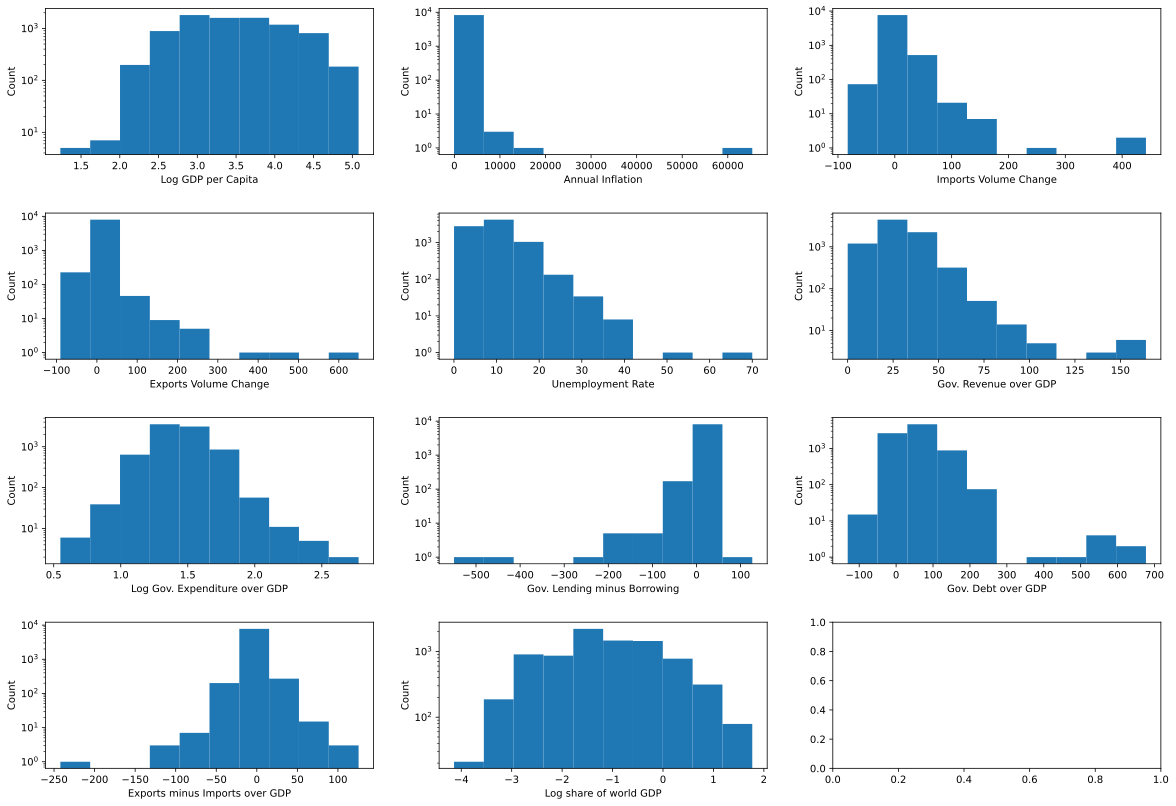

In [515]:
plt.subplots(4, 3, figsize=(20, 12), sharex=True) #9 plots of Features shown. 5x2 matrix


plt.rcParams.update({'font.size': 10})

plt.subplot(4, 3, 1)
plt.hist(data['log_gdp_per_capita']) 
plt.xlabel("Log GDP per Capita") # X label = feature
plt.ylabel("Count") # Y label = Count for each interval
plt.yscale('log') #Count is logarithmic. 10^n


plt.subplot(4, 3, 2)
plt.hist(data['annual_inflation'])
plt.xlabel("Annual Inflation")
plt.ylabel("Count")
plt.yscale('log')


plt.subplot(4, 3, 3)
plt.hist(data['change_in_volume_of_imports'])
plt.xlabel("Imports Volume Change")
plt.ylabel("Count")
plt.yscale('log')


plt.subplot(4, 3, 4)
plt.hist(data['change_in_volume_of_exports'])
plt.xlabel("Exports Volume Change")
plt.ylabel("Count")
plt.yscale('log')


plt.subplot(4, 3, 5)
plt.hist(data['unemployment_rate'])
plt.xlabel("Unemployment Rate")
plt.ylabel("Count")
plt.yscale('log')

plt.subplot(4, 3, 6)
plt.hist(data['gov_revenue_per_GDP'])
plt.xlabel("Gov. Revenue over GDP")
plt.ylabel("Count")
plt.yscale('log')

plt.subplot(4, 3, 7)
plt.hist(data['log_gov_expenditure_per_GDP'])
plt.xlabel("Log Gov. Expenditure over GDP")
plt.ylabel("Count")
plt.yscale('log')

plt.subplot(4, 3, 8)
plt.hist(data['gov_lending_minus_borrowing_per_GDP'])
plt.xlabel("Gov. Lending minus Borrowing")
plt.ylabel("Count")
plt.yscale('log')

plt.subplot(4, 3, 9)
plt.hist(data['gov_net_debt_per_GDP'])
plt.xlabel("Gov. Debt over GDP")
plt.ylabel("Count")
plt.yscale('log')


plt.subplot(4, 3, 10)
plt.hist(data['exports_minus_imports_per_GDP'])
plt.xlabel("Exports minus Imports over GDP")
plt.ylabel("Count")
plt.yscale('log')

plt.subplot(4, 3, 11)
plt.hist(data['log10_share_world_GDP'])
plt.xlabel("Log share of world GDP")
plt.ylabel("Count")
plt.yscale('log')


plt.subplots_adjust(top=0.90, bottom=0.02, wspace=0.20, hspace=0.4) # margins
#sns.set()    
plt.show()

# Largest debtors by percentage of GDP

In [516]:
# largest debtors by percentage of GDP
df1 = data[data['Year'] == 2020].sort_values(by=['gov_net_debt_per_GDP'], ascending = False)
df1 = df1[['Country_Name', 'gov_net_debt_per_GDP']]
df1 = df1.reset_index(drop=True)
df1.head(10)

,Country_Name,gov_net_debt_per_GDP
0,Japan,153.487
1,Lebanon,150.607
2,Barbados,124.444
3,Italy,122.902
4,Cape Verde,117.858
5,Portugal,116.033
6,France,89.334
7,Belgium,86.469
8,United States,83.154
9,Spain,82.714


# Smallest debtors by percentage of GDP

In [517]:
# smallest debtors by percentage of GDP

df1.tail(10)

,Country_Name,gov_net_debt_per_GDP
202,New Zealand,4.774
203,Lesotho,0.750
204,SaudiArabia,-0.087
205,Botswana,-1.276
206,Estonia,-1.765
207,Solomon Islands,-3.492
208,Trinidad and Tobago,-9.737
209,Luxembourg,-10.731
210,Kazakhstan,-15.780
211,Norway,-71.796


## Default Frequency (Occurences over Time)

In [518]:
#default number per year
h = pd.read_csv("Data_number_of_defaults.csv") 
h.drop(h.filter(regex="Unname"),axis=1, inplace=True)
h.tail()

,Year,Number_of_Defaults
36,2016,2
37,2017,3
38,2018,3
39,2019,2
40,2020,4


Text(0.5, 1.0, 'Number of Defaults per Year')

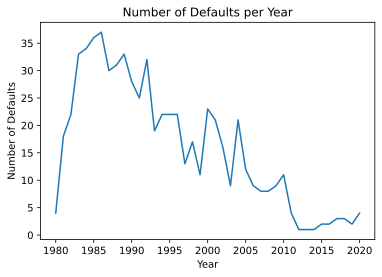

In [519]:
plt.plot(h['Year'], h['Number_of_Defaults']) #plot of number of defaults per year
plt.xlabel("Year")
plt.ylabel("Number of Defaults")
plt.title("Number of Defaults per Year")

## Heatmap (correlation of features)

In [520]:
data1 = data.drop('Year', axis = 1) # drop year
#data1 = data.drop('default_probability', axis = 1)
corr = data1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,default_flag,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP
default_flag,1.000,-0.199,0.007,-0.041,-0.014,0.158,-0.135,-0.100,-0.026,0.180,-0.060,-0.036
log_gdp_per_capita,-0.199,1.000,-0.021,-0.018,-0.039,-0.253,0.484,0.422,0.085,-0.277,0.262,0.485
annual_inflation,0.007,-0.021,1.000,-0.006,-0.023,0.058,-0.018,0.010,-0.027,-0.001,-0.002,-0.002
change_in_volume_of_imports,-0.041,-0.018,-0.006,1.000,0.366,-0.047,-0.001,-0.043,0.018,-0.012,-0.052,0.020
change_in_volume_of_exports,-0.014,-0.039,-0.023,0.366,1.000,-0.004,-0.023,-0.033,-0.017,-0.004,0.024,0.011
unemployment_rate,0.158,-0.253,0.058,-0.047,-0.004,1.000,-0.179,-0.111,-0.061,0.350,-0.128,-0.170
gov_revenue_per_GDP,-0.135,0.484,-0.018,-0.001,-0.023,-0.179,1.000,0.835,0.072,-0.292,0.140,0.108
log_gov_expenditure_per_GDP,-0.100,0.422,0.010,-0.043,-0.033,-0.111,0.835,1.000,-0.221,-0.222,-0.015,0.119
gov_lending_minus_borrowing_per_GDP,-0.026,0.085,-0.027,0.018,-0.017,-0.061,0.072,-0.221,1.000,-0.062,0.200,0.049
gov_net_debt_per_GDP,0.180,-0.277,-0.001,-0.012,-0.004,0.350,-0.292,-0.222,-0.062,1.000,-0.049,-0.143


# XGBoost

In [521]:

X = data[['log_gdp_per_capita','annual_inflation' ,   \
   'change_in_volume_of_imports',  'change_in_volume_of_exports', 'unemployment_rate',  \
   'gov_revenue_per_GDP', 'log_gov_expenditure_per_GDP', 'gov_lending_minus_borrowing_per_GDP',\
          'gov_net_debt_per_GDP', 'exports_minus_imports_per_GDP', 'log10_share_world_GDP']]  




y = data['default_flag']
y=y.astype('int')

import xgboost as xgb
from xgboost import XGBClassifier
#from sklearn.linear_model import LogisticRegression

y = data['default_flag']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 0)
model = XGBClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
#print("Accuracy_Score:",accuracy_score(y_test,y_pred))
#print("F1_Score:",f1_score(y_test,y_pred))
print("Classification Report", classification_report(y_test,y_pred))


[20:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9222087867795243
Precision: 0.43137254901960786
Recall: 0.11827956989247312
Classification Report               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2295
           1       0.43      0.12      0.19       186

    accuracy                           0.92      2481
   macro avg       0.68      0.55      0.57      2481
weighted avg       0.89      0.92      0.90      2481



In [522]:
confusion_matrix(y_test,y_pred)

array([[2266,   29],
       [ 164,   22]], dtype=int64)

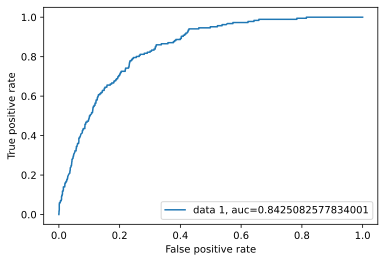

In [523]:

from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba) #AuC originally worse because of small default dataset (200 defaults)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + repr(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()


In [524]:
data['default_probability'] = 100.*model.predict_proba(X)[:, 1]
data.head()

,Country_Name,Country_code,Year,default_flag,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,default_probability
0,Afghanistan,AFG,1982,0,2.892346,12.3790,8.3500,-1.9000,13.6230,12.2330,1.184862,-2.031,174.236,-4.7325,-1.295321,8.040442
1,Afghanistan,AFG,1983,0,2.955046,12.0890,3.2235,2.0740,13.6230,13.7295,1.275887,-3.181,174.236,-5.9035,-1.340026,29.997322
2,Afghanistan,AFG,1984,0,2.904777,12.4555,0.9340,-0.6000,14.3115,17.8350,1.333387,-1.490,174.236,-5.4585,-1.369093,12.747767
3,Afghanistan,AFG,1985,0,2.897701,9.8775,-2.7000,1.9870,13.9545,16.5930,1.383322,-0.873,174.236,-4.4945,-1.360655,25.682657
4,Afghanistan,AFG,1986,0,2.841643,10.2650,-1.3370,3.2095,13.7180,17.6000,1.370402,-2.559,174.236,-3.0125,-1.378554,19.674530


# Countries most likely to default in 2020

In [525]:
#Find the countries with the highest probability of default in 2020
dg0 = data[data['Year'] == 2020].sort_values(by=['default_probability'], ascending = False)
dg0.head(20)

,Country_Name,Country_code,Year,default_flag,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,default_probability
3626,Jamaica,JAM,2020,1,3.758224,3.740,1.195,14.586,9.125,30.633,1.469100,7.474,42.5095,-1.560,-1.491340,81.981857
2183,Ecuador,ECU,2020,1,3.800613,-0.224,3.631,0.727,3.690,35.325,1.585461,-0.699,42.5095,-1.241,-0.675637,80.168205
5381,Nicaragua,NIC,2020,1,3.305811,4.947,-17.237,-2.994,5.500,24.530,1.439538,-1.891,42.5095,-1.857,-1.568754,73.752892
5615,Pakistan,PAK,2020,0,3.192537,3.925,10.144,6.205,5.550,15.210,1.335097,-2.090,66.5050,-6.355,-0.553081,12.244322
2417,Ethiopia,ETH,2020,0,2.930445,13.833,-0.671,23.825,11.731,13.070,1.206826,-2.503,57.4660,-6.522,-0.664080,11.925014
311,Argentina,ARG,2020,0,4.065389,34.277,-5.591,-0.264,9.200,33.974,1.596487,-2.269,42.5095,-5.226,-0.061557,8.088717
3119,Haiti,HTI,2020,0,2.938660,12.885,12.354,4.915,7.330,17.268,1.278456,-1.412,42.5095,-3.860,-1.722953,6.106523
3002,Guinea,GIN,2020,0,2.962001,9.826,10.117,-10.254,11.731,14.545,1.193347,-0.262,45.5230,-18.737,-1.491035,5.964782
5186,Namibia,NAM,2020,0,3.748956,4.294,3.558,10.680,11.731,31.506,1.565600,-1.883,46.8050,-2.753,-1.633675,5.843501
7409,Togo,TGO,2020,0,2.832012,0.928,3.540,1.649,11.731,23.893,1.392134,1.590,45.5230,-3.451,-1.887164,5.264274


# Countries least likely to default in 2020

In [526]:
#Find the countries with the lowest probability of default in 2020
dg0 = data[data['Year'] == 2020].sort_values(by=['default_probability'], ascending = False)
dg0.tail(20)

,Country_Name,Country_code,Year,default_flag,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,default_probability
5342,New Zealand,NZL,2020,0,4.629435,1.598,6.465,2.844,4.275,37.824,1.561054,2.054,4.774,-4.284,-0.357702,0.010688
6278,SaudiArabia,SAU,2020,0,4.371787,2.450,2.252,8.801,6.000,30.704,1.563184,-6.525,-0.087,9.151,0.188598,0.010537
6005,Qatar,QAT,2020,0,4.822309,0.184,1.212,4.760,11.731,34.819,1.460838,7.391,45.523,9.083,-0.474836,0.009885
3665,Japan,JPN,2020,0,4.592735,0.979,3.719,3.486,2.442,35.030,1.574332,-2.173,153.487,3.567,1.046649,0.008983
4874,Micronesia Fed.Sts.,FSM,2020,0,3.594187,1.490,-1.100,0.449,4.500,89.347,1.808623,25.214,14.415,21.040,-3.047887,0.008435
1832,Croatia,HRV,2020,0,4.173649,1.500,7.453,3.692,9.858,46.516,1.665525,2.321,62.753,1.840,-0.890380,0.007960
7487,Trinidad and Tobago,TTO,2020,0,4.233763,1.019,-11.657,-1.046,4.067,24.723,1.487351,-2.999,-9.737,5.756,-1.288114,0.007473
3197,Hong Kong SARChina,HKG,2020,0,4.684072,2.408,4.486,3.658,2.816,20.742,1.264629,0.957,29.200,3.739,-0.111323,0.007305
7994,Vanuatu,VUT,2020,0,3.512159,2.331,-1.100,0.449,4.500,39.535,1.503382,8.617,14.415,9.438,-2.707970,0.007105
1130,Bulgaria,BGR,2020,0,3.976184,2.631,5.702,1.703,5.200,34.519,1.536508,0.335,8.986,1.380,-0.812505,0.006671


# Probability of Sovereign Default for Argentina and 7 other countries

In [527]:
df1 = data[data['Country_Name'] == 'Argentina']
df1.head()

,Country_Name,Country_code,Year,default_flag,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,default_probability
273,Argentina,ARG,1982,1,3.922269,19.039,41.493,43.237,3.0,18.5475,1.414840,4.4120,58.405,-1.101,0.083794,0.795207
274,Argentina,ARG,1983,0,3.824219,14.589,-8.239,5.204,5.0,24.0240,1.478667,1.2360,58.405,-3.014,0.162781,1.179115
275,Argentina,ARG,1984,0,3.512931,9.023,-42.580,3.947,4.5,14.6520,1.397714,2.6390,58.405,-3.095,0.196803,18.706760
276,Argentina,ARG,1985,1,3.597996,10.244,-6.924,2.582,5.0,13.2950,1.426609,1.3690,58.405,-2.095,0.059186,24.490782
277,Argentina,ARG,1986,0,3.640956,12.013,4.705,-2.591,5.0,12.5680,1.396670,2.4785,58.405,-1.911,0.070708,32.909603


Text(0, 0.5, 'Probability of Default')

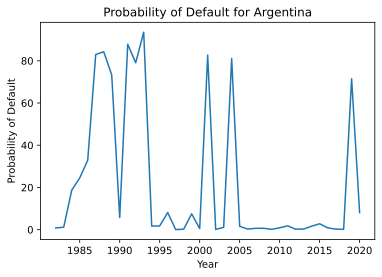

In [528]:
plt.plot(df1['Year'], df1['default_probability']) #1980s economic crisis in South America, Argentina economic crisis around 2003
plt.title("Probability of Default for Argentina")
plt.xlabel("Year")
plt.ylabel("Probability of Default")
#plt.xlim(left=1990)
#plt.ylim(top=25)

In [529]:
df0 = data[data['Country_Name'] == 'United States']
df1 = data[data['Country_Name'] == 'Brazil']
df2 = data[data['Country_Name'] == 'Japan']
df3 = data[data['Country_Name'] == 'Australia']
df4 = data[data['Country_Name'] == 'Portugal']
df5 = data[data['Country_Name'] == 'Norway']
df6 = data[data['Country_Name'] == 'Sudan']
df7 = data[data['Country_Name'] == 'Greece']


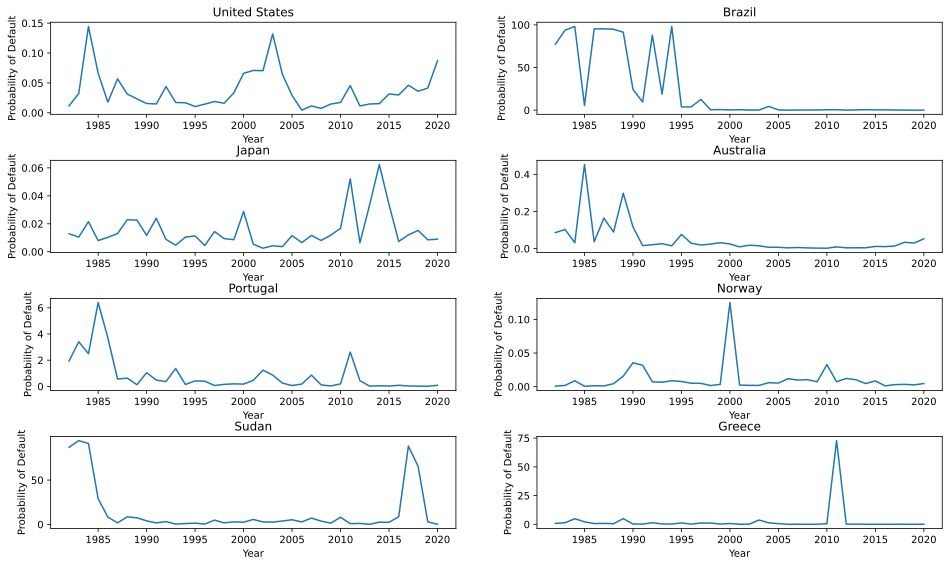

In [530]:
plt.subplots(4, 2, figsize=(16, 8), sharex=True) # I will Scale y-axis later


plt.rcParams.update({'font.size': 10})

plt.subplot(4, 2, 1)
plt.plot(df0['Year'], df0['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("United States")



plt.subplot(4, 2, 2)
plt.plot(df1['Year'], df1['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Brazil")



plt.subplot(4, 2, 3)
plt.plot(df2['Year'], df2['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Japan")


plt.subplot(4, 2, 4)
plt.plot(df3['Year'], df3['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Australia")



plt.subplot(4, 2, 5)
plt.plot(df4['Year'], df4['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Portugal")



plt.subplot(4, 2, 6)
plt.plot(df5['Year'], df5['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Norway")


plt.subplot(4, 2, 7)
plt.plot(df6['Year'], df6['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Sudan")



plt.subplot(4, 2, 8)
plt.plot(df7['Year'], df7['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Greece")



#plt.subplots_adjust(top=0.90, bottom=0.02, wspace=0.20, hspace=0.5)
plt.subplots_adjust(top=0.90, bottom=0.02, wspace=0.20, hspace=0.5)
#sns.set()    
plt.show()


In [531]:
#predictions from the IMF for economic quantities:
fut = pd.read_csv("Data_predicted_economic_quantities_3.csv") 
fut.drop(data.filter(regex="Unname"),axis=1, inplace=True)
fut.head()

,Country_Name,Country_code,Year,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,Unnamed: 14
0,Afghanistan,AFG,2021,2.705256,2.302,-7.8620,-5.1160,9.2000,26.941,1.447143,-1.019,50.2550,11.705,-1.388315,NaN
1,Albania,ALB,2021,3.726172,1.411,4.7210,1.6990,11.5000,27.425,1.468096,0.137,59.5910,-7.632,-1.513430,NaN
2,Algeria,DZA,2021,3.590843,1.952,-0.0270,-3.6360,11.3830,32.603,1.582529,-6.253,30.5260,-10.110,-0.491417,NaN
3,American Samoa,ASM,2021,3.634361,1.828,2.2580,-1.7110,4.5000,41.681,1.585675,-1.248,18.3255,2.282,-2.763527,NaN
4,Andorra,ADO,2021,4.289637,1.628,2.8045,3.3245,5.5795,41.232,1.613958,1.069,41.6570,-0.371,-0.777419,NaN


## Using predicted macro-economic quantities from the IMF to calculate the 2021 Default Probability

In [532]:
fut21 = fut[fut['Year'] == 2021]
fut21.head(20)

,Country_Name,Country_code,Year,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,Unnamed: 14
0,Afghanistan,AFG,2021,2.705256,2.302,-7.8620,-5.1160,9.2000,26.941,1.447143,-1.019,50.2550,11.705,-1.388315,NaN
1,Albania,ALB,2021,3.726172,1.411,4.7210,1.6990,11.5000,27.425,1.468096,0.137,59.5910,-7.632,-1.513430,NaN
2,Algeria,DZA,2021,3.590843,1.952,-0.0270,-3.6360,11.3830,32.603,1.582529,-6.253,30.5260,-10.110,-0.491417,NaN
3,American Samoa,ASM,2021,3.634361,1.828,2.2580,-1.7110,4.5000,41.681,1.585675,-1.248,18.3255,2.282,-2.763527,NaN
4,Andorra,ADO,2021,4.289637,1.628,2.8045,3.3245,5.5795,41.232,1.613958,1.069,41.6570,-0.371,-0.777419,NaN
5,Angola,AGO,2021,3.472458,17.079,-11.2890,0.2270,9.2000,20.015,1.283821,6.014,50.2550,5.739,-0.849636,NaN
6,Antigua and Barbuda,ATG,2021,4.235414,1.475,-1.1910,8.0480,7.3835,18.923,1.361104,-1.246,43.6780,-6.507,-2.515879,NaN
7,Argentina,ARG,2021,3.995210,53.548,-21.1070,12.1550,9.8250,33.859,1.583505,-0.409,43.6780,-0.899,-0.062533,NaN
8,Armenia,ARM,2021,3.663208,1.443,9.4790,13.8530,18.9000,23.831,1.394539,1.425,41.6570,-8.180,-1.563811,NaN
9,Aruba,ABW,2021,4.410685,4.257,-0.1710,1.4380,7.5440,27.461,1.432504,4.827,43.6780,2.093,-2.272841,NaN


# Countries most likely to default in 2021

In [533]:
save_fut21 = fut21
fut21.drop(fut21.filter(regex="Unname"),axis=1, inplace=True)
fut21 = fut21.drop('Country_Name',  axis = 1)
fut21 = fut21.drop('Country_code',  axis = 1)
fut21 = fut21.drop('Year', axis = 1)

new_fut21 = fut21.values.reshape(212,11)
pred_21 = 100.*(1. - model.predict_proba(new_fut21))
new_prob21 = pd.DataFrame({'Default_Prob_2021': pred_21[:, 0]})
#new_prob21.head()

result = save_fut21.join(new_prob21, how='inner')
result.drop(data.filter(regex="Unname"),axis=1, inplace=True)
new_result = result.sort_values(by=['Default_Prob_2021'], ascending = False)
new_result.head(20)

,Country_Name,Country_code,Year,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,Default_Prob_2021
132,Namibia,NAM,2021,3.705211,3.721,-8.475,-8.772,9.2000,32.582,1.585088,-1.886,50.255,-2.278,-1.622398,27.753056
92,Jamaica,JAM,2021,3.765377,3.910,10.560,6.965,7.7000,30.504,1.471189,7.084,43.678,-2.005,-1.495874,16.526676
29,Burkina Faso,BFA,2021,2.889131,-3.233,-0.343,-2.922,9.2000,20.399,1.377816,-2.199,50.255,-4.772,-1.419822,11.012864
208,Yemen Rep.,YEM,2021,2.853133,10.000,29.194,30.289,9.2000,8.523,1.141199,-5.074,75.839,-3.933,-1.402573,10.502362
210,Zimbabwe,ZWE,2021,3.098467,255.292,1.566,1.749,9.2000,14.693,1.213305,-1.229,50.255,1.112,-1.779678,9.269369
96,Kenya,KEN,2021,3.301989,5.204,-2.023,-0.218,9.2000,17.680,1.405073,-3.924,57.209,-5.820,-0.658608,7.113772
179,Sudan,SDN,2021,2.887513,50.994,16.862,7.954,22.1000,7.893,1.273649,-10.708,50.255,-15.109,-1.171042,6.764686
205,Venezuela RB,VEN,2021,3.361598,19906.020,-32.644,-28.869,7.3835,11.359,1.329581,-9.971,43.678,8.368,-1.041637,6.361026
161,Senegal,SEN,2021,3.160135,1.020,3.360,4.653,9.2000,20.189,1.380465,-1.925,50.255,-7.687,-1.233852,6.338286
113,Macedonia FYR,MKD,2021,3.785972,0.766,8.958,8.315,17.2500,29.233,1.493974,-0.791,39.558,-2.765,-1.523941,5.444276


# Countries least likely to default in 2021

In [534]:
new_result.tail(20)

,Country_Name,Country_code,Year,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,Default_Prob_2021
196,Tuvalu,TUV,2021,3.634361,2.177,2.258,-1.711,4.500,117.299,2.100022,-10.343,18.3255,12.427,-4.001364,0.009251
46,Croatia,HRV,2021,4.171815,0.772,4.784,4.585,7.758,47.517,1.673242,2.403,41.6570,2.777,-0.864122,0.009149
153,Qatar,QAT,2021,4.798781,-0.552,2.080,0.314,9.200,37.490,1.512724,6.452,50.2550,2.405,-0.490676,0.008327
28,Bulgaria,BGR,2021,3.989990,2.457,2.418,1.938,4.200,35.405,1.560767,-0.826,8.1380,4.042,-0.790672,0.006938
124,Micronesia Fed.Sts.,FSM,2021,3.606906,1.863,2.258,-1.711,4.500,80.191,1.804855,16.607,18.3255,15.965,-3.069821,0.006062
165,Singapore,SGP,2021,4.814473,0.565,-1.703,-1.559,2.250,18.183,1.156640,-1.883,28.9245,16.970,-0.123268,0.005949
120,Marshall Islands,MHL,2021,3.636054,1.200,2.258,22.333,4.500,66.207,1.819241,0.497,18.3255,8.035,-3.324670,0.005692
3,American Samoa,ASM,2021,3.634361,1.828,2.258,-1.711,4.500,41.681,1.585675,-1.248,18.3255,2.282,-2.763527,0.005525
140,Northern Mariana Islands,MNP,2021,3.634361,1.828,2.258,-1.711,4.500,41.681,1.585675,-1.248,18.3255,2.282,-2.763527,0.005525
74,Guam,GUM,2021,3.634361,1.828,2.258,-1.711,4.500,41.681,1.585675,-1.248,18.3255,2.282,-2.763527,0.005525


## Using predicted macro-economic quantities from the IMF to calculate the 2025 Default Probability

In [535]:
fut25 = fut[fut['Year'] == 2025]
fut25 = fut25.reset_index(drop=True)
fut25.drop(fut25.filter(regex="Unname"),axis=1, inplace=True)
save_fut25 = fut25
save_fut25.head()

,Country_Name,Country_code,Year,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP
0,Afghanistan,AFG,2025,2.732813,4.043,0.535,10.014,9.305,28.553,1.462892,-0.391,64.471,7.658,-1.394818
1,Albania,ALB,2025,3.793601,2.680,12.832,12.660,11.000,27.047,1.463774,0.028,67.397,-7.934,-1.479552
2,Algeria,DZA,2025,3.549153,5.200,1.087,0.009,15.747,26.591,1.556929,-8.679,79.998,-13.549,-0.539265
3,American Samoa,ASM,2025,3.650557,2.096,3.658,4.186,5.253,36.496,1.594525,-1.651,47.248,-2.553,-2.786074
4,Andorra,ADO,2025,4.393464,1.954,4.420,4.488,6.232,40.771,1.638888,-0.312,49.053,-1.115,-0.783271


## Countries more likely to default in 2025

In [536]:
fut25 = fut25.drop('Country_Name',  axis = 1)
fut25 = fut25.drop('Country_code',  axis = 1)
fut25 = fut25.drop('Year', axis = 1)
new_fut25 = fut25.values.reshape(212,11) # creating numpy array
pred_25 = 100.*(1. - model.predict_proba(new_fut25))  # calculating probability of default
new_prob25 = pd.DataFrame({'Default_Prob_2025': pred_25[:, 0]}) # creating dataframe with column name
result = save_fut25.join(new_prob25, how='inner') # joining the probability of default with original dataframe
result.drop(data.filter(regex="Unname"),axis=1, inplace=True)
new_result = result.sort_values(by=['Default_Prob_2025'], ascending = False)
new_result = new_result.reset_index(drop = True)
new_result.head(20)

,Country_Name,Country_code,Year,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,Default_Prob_2025
0,Sudan,SDN,2025,2.834332,27.792,0.5560,4.193,19.400,13.893,1.212481,-2.358,64.4710,-9.547,-1.233271,82.612625
1,Chad,TCD,2025,2.893040,2.994,5.7550,4.149,9.305,18.483,1.212747,2.935,64.4710,-6.667,-1.578404,28.589367
2,Yemen Rep.,YEM,2025,2.699362,15.000,8.6410,42.540,9.305,7.438,1.093247,-2.948,71.5730,-8.557,-1.501222,23.825050
3,Togo,TGO,2025,2.928344,2.007,7.8160,7.886,9.305,24.064,1.415674,0.700,64.4710,-4.369,-1.832075,18.101889
4,Central African Republic,CAF,2025,2.768090,2.459,8.1940,7.566,9.305,17.707,1.270143,-0.697,64.4710,-5.659,-2.241380,16.656797
5,Zimbabwe,ZWE,2025,2.733480,3.000,4.3275,4.638,9.305,14.771,1.162953,1.180,64.4710,-6.735,-1.792838,13.815826
6,Guinea,GIN,2025,3.072999,7.800,2.8160,3.641,9.305,16.298,1.260810,-0.944,64.4710,-11.293,-1.473508,12.977612
7,Haiti,HTI,2025,2.862256,17.326,3.6580,0.138,8.326,17.613,1.296490,-1.822,54.8855,-1.059,-1.815896,10.862959
8,Rwanda,RWA,2025,2.971213,5.000,4.3080,10.314,9.305,20.633,1.382773,-2.096,64.4710,-8.756,-1.606400,10.455698
9,Burundi,BDI,2025,2.436455,3.200,1.5130,3.638,9.305,22.437,1.435127,-2.552,64.4710,-17.757,-2.193213,7.891983


## Countries less likely to default in 2025

In [537]:
new_result.tail(20)

,Country_Name,Country_code,Year,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,Default_Prob_2025
192,Greenland,GRL,2025,4.703471,2.113,4.245,5.790,6.638,30.307,1.554598,-2.651,78.8415,-2.377,0.559411,0.015336
193,Bermuda,BMU,2025,4.703471,2.113,4.245,5.790,6.638,30.307,1.554598,-2.651,78.8415,-2.377,0.559411,0.015336
194,Kiribati,KIR,2025,3.278580,2.187,2.058,4.524,5.253,99.976,1.993480,2.010,47.2480,8.434,-3.373469,0.014627
195,Korea Rep.,KOR,2025,4.552457,1.300,3.914,3.819,4.000,22.923,1.408427,-2.773,28.8090,3.984,0.525825,0.014323
196,Canada,CAN,2025,4.703471,1.858,5.794,5.790,6.638,39.004,1.623136,-2.651,47.4350,-2.377,0.559411,0.013733
197,Qatar,QAT,2025,4.787922,2.452,-4.044,-1.847,9.305,34.041,1.425208,9.059,64.4710,2.224,-0.499792,0.012743
198,Slovenia,SVN,2025,4.509382,1.773,7.765,6.065,4.600,43.319,1.638888,1.005,49.0530,2.057,-0.915032,0.012684
199,Solomon Islands,SLB,2025,3.439918,3.646,2.077,2.886,5.253,32.398,1.562210,-3.699,15.9120,-11.912,-2.440473,0.012398
200,Micronesia Fed.Sts.,FSM,2025,3.622965,2.000,3.658,4.186,5.253,64.571,1.779084,4.653,47.2480,5.299,-3.123698,0.012177
201,Italy,ITA,2025,4.578821,1.048,4.044,3.626,10.300,47.491,1.700548,0.335,143.3640,2.994,0.596294,0.012141


In [538]:
# predicting probabilities of default in a given year
def predicting_probability_of_default(a_year):
 fut_df = fut[fut['Year'] == a_year]
 fut_df = fut_df.reset_index(drop=True)
 fut_df.drop(fut_df.filter(regex="Unname"),axis=1, inplace=True)
 save_fut_df = fut_df
 fut_df = fut_df.drop('Country_Name',  axis = 1)
 fut_df = fut_df.drop('Country_code',  axis = 1)
 fut_df = fut_df.drop('Year', axis = 1)
 new_fut_df = fut_df.values.reshape(212,11) # creating numpy array
 pred_df = 100.*(1. - model.predict_proba(new_fut_df))  # calculating probability of default
 new_prob_df = pd.DataFrame({'Default_Probability': pred_df[:, 0]}) # creating dataframe with column name
 result = save_fut_df.join(new_prob_df, how='inner') # joining the probability of default with original dataframe
 result.drop(data.filter(regex="Unname"),axis=1, inplace=True)
 new_result = result.sort_values(by=['Default_Probability'], ascending = False)
 new_result = new_result.reset_index(drop=True)
 return (new_result)

In [539]:
prob_result = predicting_probability_of_default(2022)
prob_result.head(20)

,Country_Name,Country_code,Year,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,Default_Probability
0,Yemen Rep.,YEM,2022,2.809645,26.400,-17.7240,-7.2200,12.338,5.731,1.174409,-8.928,81.0800,-6.490,-1.458169,94.559380
1,Seychelles,SYC,2022,4.090702,3.898,-30.4120,-33.9380,3.000,35.169,1.704451,-11.648,78.4600,-28.335,-2.556764,56.597961
2,Zambia,ZMB,2022,3.000625,14.450,-8.4340,-4.6600,12.338,17.996,1.380085,2.402,99.7200,-1.037,-1.397807,39.085579
3,Ecuador,ECU,2022,3.725546,1.812,-16.3430,-9.4010,8.074,30.093,1.591209,-5.839,57.5605,-2.003,-0.697046,22.532404
4,Antigua and Barbuda,ATG,2022,4.151019,0.991,-39.6810,-58.9660,11.225,17.867,1.477902,-9.321,57.5605,-22.035,-2.490779,17.594004
5,SierraLeone,SLE,2022,2.714720,15.696,2.5170,-8.2740,12.338,19.780,1.417505,-3.333,62.7410,-12.130,-2.117209,13.012939
6,Sudan,SDN,2022,2.866049,141.604,-8.1890,-1.6630,25.000,6.842,1.135864,-6.822,62.7410,-12.728,-1.205697,11.703051
7,Grenada,GRD,2022,3.992303,-0.244,-24.5770,-53.7680,11.225,24.781,1.423393,0.520,57.5605,-25.285,-2.629509,11.580396
8,Haiti,HTI,2022,2.864550,22.395,-2.6410,-29.8910,11.225,13.820,1.294246,-5.560,57.5605,-2.471,-1.788772,10.555726
9,Chad,TCD,2022,2.806076,2.797,5.9980,10.6230,12.338,18.672,1.285805,0.311,62.7410,-13.257,-1.593508,8.139801


In [540]:
prob_result.tail(20)

,Country_Name,Country_code,Year,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,Default_Probability
192,Hong Kong SARChina,HKG,2022,4.654905,0.300,-13.184,-11.549,5.234,16.754,1.455560,-13.049,34.3435,4.351,-0.119487,0.030804
193,United States,USA,2022,4.799695,1.520,-12.311,-12.627,8.891,28.470,1.673832,-16.688,106.7810,-2.123,1.652064,0.030649
194,Latvia,LVA,2022,4.236289,0.566,-5.931,-4.661,9.000,38.849,1.646208,-4.520,35.1450,2.005,-1.094503,0.028962
195,Switzerland,CHE,2022,4.913111,-0.770,-6.142,-5.940,3.211,33.120,1.572035,-4.003,27.9510,8.477,0.211297,0.026792
196,Bulgaria,BGR,2022,3.992383,1.198,-10.012,-12.114,5.600,36.316,1.583346,-1.850,8.7970,1.890,-0.785627,0.026423
197,Vanuatu,VUT,2022,3.459195,2.915,-11.036,-13.869,6.908,47.410,1.740631,-6.731,30.3915,-0.306,-2.723177,0.024146
198,United Arab Emirates,ARE,2022,4.504443,-1.500,-13.142,-11.936,12.338,26.014,1.555252,-9.271,62.7410,3.551,-0.118283,0.021988
199,Germany,DEU,2022,4.657688,0.495,-8.444,-11.996,4.267,45.740,1.731702,-7.615,54.1140,5.754,0.949609,0.021684
200,Russian Federation,RUS,2022,3.998804,3.220,-12.642,-8.773,5.600,32.010,1.571651,-4.861,53.5000,1.172,0.511733,0.020444
201,Lithuania,LTU,2022,4.298483,1.277,-6.903,-4.556,8.200,33.156,1.600668,-6.712,42.0380,7.218,-0.883866,0.019026


## Changing variables by a given amount with respect to the year of 2020 to find the new Default Probability of the selected country

In [541]:
# changing GDP per capita byf 10% and keeping the other variables the same
factor_log_gdp_per_capita = 10.                
factor_annual_inflation = 0.                   
factor_change_in_volume_of_imports = 0.        
factor_change_in_volume_of_exports = 0.           
factor_unemployment_rate = 0.                   
factor_gov_revenue_per_GDP = 0.                  
factor_log_gov_expenditure_per_GDP = 0.          
factor_gov_lending_minus_borrowing_per_GDP = 0.
factor_gov_net_debt_per_GDP   = 0.                
factor_exports_minus_imports_per_GDP = 0.          
factor_log10_share_world_GDP = 0.      

selected_country = "Sudan"

fut = pd.read_csv("Data_default_and_economics_3.csv") 
fut.drop(data.filter(regex="Unname"),axis=1, inplace=True)
fut.head()

fut_df = fut[fut['Year'] == 2020]
fut_df = fut_df[fut_df['Country_Name'] == selected_country]
fut_df = fut_df.reset_index(drop=True)
fut_df.drop(fut_df.filter(regex="Unname"),axis=1, inplace=True)
save_fut_df = fut_df
fut_df = fut_df.drop('Country_Name',  axis = 1)
fut_df = fut_df.drop('Country_code',  axis = 1)
fut_df = fut_df.drop('Year', axis = 1)
fut_df = fut_df.drop('default_flag', axis = 1)
fut_df.tail()



          


fut_df['log_gdp_per_capita'] = fut_df['log_gdp_per_capita']*(100. + factor_log_gdp_per_capita)/100.
fut_df['annual_inflation'] = fut_df['annual_inflation']*(100. + factor_annual_inflation)/100.
fut_df['change_in_volume_of_imports'] = fut_df['change_in_volume_of_imports']*(100. + factor_change_in_volume_of_imports)/100.
fut_df['change_in_volume_of_exports'] = fut_df['change_in_volume_of_exports']*(100. + factor_change_in_volume_of_exports)/100.
fut_df['unemployment_rate'] = fut_df['unemployment_rate']*(100. + factor_unemployment_rate)/100.
fut_df['gov_revenue_per_GDP'] = fut_df['gov_revenue_per_GDP']*(100. + factor_gov_revenue_per_GDP)/100.
fut_df['log_gov_expenditure_per_GDP'] = fut_df['log_gov_expenditure_per_GDP']*(100. + factor_log_gov_expenditure_per_GDP)/100.
fut_df['gov_lending_minus_borrowing_per_GDP'] = fut_df['gov_lending_minus_borrowing_per_GDP']*(100. + factor_gov_lending_minus_borrowing_per_GDP)/100.
fut_df['gov_net_debt_per_GDP'] = fut_df['gov_net_debt_per_GDP']*(100. + factor_gov_net_debt_per_GDP)/100.
fut_df['exports_minus_imports_per_GDP'] = fut_df['exports_minus_imports_per_GDP']*(100. + factor_exports_minus_imports_per_GDP)/100.
fut_df['log10_share_world_GDP'] = fut_df['log10_share_world_GDP']*(100. + factor_log10_share_world_GDP)/100.


new_fut_df = fut_df.values.reshape(1,11) # creating numpy array
pred_df = 100.*(1. - model.predict_proba(new_fut_df))  # calculating probability of default
new_prob_df = pd.DataFrame({'Default_Probability': pred_df[:, 0]}) # creating dataframe with column name
result = save_fut_df.join(new_prob_df, how='inner') # joining the probability of default with original dataframe
result.drop(data.filter(regex="Unname"),axis=1, inplace=True)
new_result = result.sort_values(by=['Default_Probability'], ascending = False)
new_result = new_result.reset_index(drop=True)
new_result.head()  


,Country_Name,Country_code,Year,default_flag,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,Default_Probability
0,Sudan,SDN,2020,0,2.929341,63.293,-19.435,-17.569,19.5,8.913,1.226265,-7.688,45.523,-13.112,-1.131586,0.285172


## Random Forest

Accuracy: 0.9254332930270053
Precision: 0.5185185185185185
Recall: 0.07526881720430108
Accuracy_Score: 0.9254332930270053
Classification Report               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2295
           1       0.52      0.08      0.13       186

    accuracy                           0.93      2481
   macro avg       0.72      0.53      0.55      2481
weighted avg       0.90      0.93      0.90      2481

[[2282   13]
 [ 172   14]]


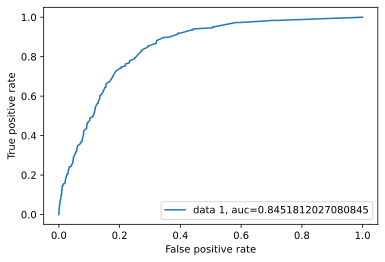

In [542]:
from sklearn.ensemble import RandomForestClassifier
y = data['default_flag']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 0) #test_size = 0.25
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy_Score:",accuracy_score(y_test,y_pred))
print("Classification Report", classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + repr(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

In [543]:
data['default_probability'] = 100.*model.predict_proba(X)[:, 1]
data.head()

,Country_Name,Country_code,Year,default_flag,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,default_probability
0,Afghanistan,AFG,1982,0,2.892346,12.3790,8.3500,-1.9000,13.6230,12.2330,1.184862,-2.031,174.236,-4.7325,-1.295321,7.626741
1,Afghanistan,AFG,1983,0,2.955046,12.0890,3.2235,2.0740,13.6230,13.7295,1.275887,-3.181,174.236,-5.9035,-1.340026,34.390698
2,Afghanistan,AFG,1984,0,2.904777,12.4555,0.9340,-0.6000,14.3115,17.8350,1.333387,-1.490,174.236,-5.4585,-1.369093,11.016656
3,Afghanistan,AFG,1985,0,2.897701,9.8775,-2.7000,1.9870,13.9545,16.5930,1.383322,-0.873,174.236,-4.4945,-1.360655,29.638936
4,Afghanistan,AFG,1986,0,2.841643,10.2650,-1.3370,3.2095,13.7180,17.6000,1.370402,-2.559,174.236,-3.0125,-1.378554,23.921662


In [544]:
df0 = data[data['Country_Name'] == 'United States'] # 8 countries will be plotted 2 cells below
df1 = data[data['Country_Name'] == 'Brazil']
df2 = data[data['Country_Name'] == 'Japan']
df3 = data[data['Country_Name'] == 'Australia']
df4 = data[data['Country_Name'] == 'Portugal']
df5 = data[data['Country_Name'] == 'Norway']
df6 = data[data['Country_Name'] == 'Sudan']
df7 = data[data['Country_Name'] == 'South Africa']


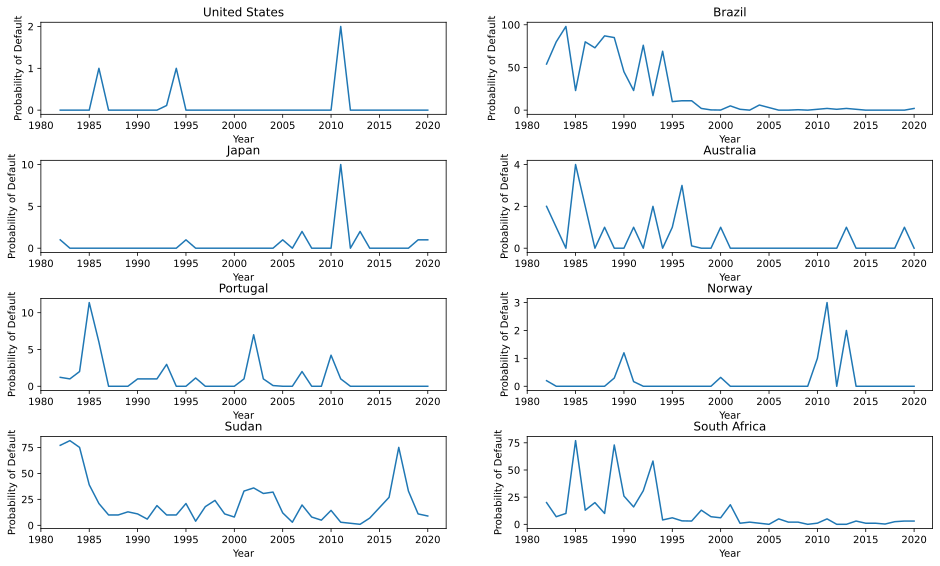

In [545]:
plt.subplots(4, 2, figsize=(16, 8), sharex=True) # I will Scale y-axis later


plt.rcParams.update({'font.size': 10})

plt.subplot(4, 2, 1)
plt.plot(df0['Year'], df0['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("United States")
plt.xlim(left=1980)
#plt.ylim(top=0.5)


plt.subplot(4, 2, 2)
plt.plot(df1['Year'], df1['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Brazil")
plt.xlim(left=1980)
#plt.ylim(top=20)


plt.subplot(4, 2, 3)
plt.plot(df2['Year'], df2['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Japan")
plt.xlim(left=1980)
#plt.ylim(top=0.5)


plt.subplot(4, 2, 4)
plt.plot(df3['Year'], df3['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Australia")
plt.xlim(left=1980)
#plt.ylim(top=1)


plt.subplot(4, 2, 5)
plt.plot(df4['Year'], df4['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Portugal")
plt.xlim(left=1980)
#plt.ylim(top=2)


plt.subplot(4, 2, 6)
plt.plot(df5['Year'], df5['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Norway")
plt.xlim(left=1980)
#plt.ylim(top=0.1)


plt.subplot(4, 2, 7)
plt.plot(df6['Year'], df6['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Sudan")
plt.xlim(left=1980)
#plt.ylim(top=0.5)


plt.subplot(4, 2, 8)
plt.plot(df7['Year'], df7['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("South Africa")
plt.xlim(left=1980)
#plt.ylim(top=0.5)


#plt.subplots_adjust(top=0.90, bottom=0.02, wspace=0.20, hspace=0.5)
plt.subplots_adjust(top=0.90, bottom=0.02, wspace=0.20, hspace=0.5)
#sns.set()    
plt.show()

# Logistic Regression

[[-7.41884201e-01  1.64163244e-04 -6.97163901e-03 -2.33856513e-03
   7.40017455e-02 -1.89283991e-02 -1.75093523e-01 -2.29409241e-03
   5.30121487e-03 -1.28971738e-02  2.59511007e-01]]
[-0.17984264]
Accuracy: 0.9238210399032648
Precision: 0.0
Recall: 0.0
Accuracy_Score: 0.9238210399032648
Classification Report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96      2295
           1       0.00      0.00      0.00       186

    accuracy                           0.92      2481
   macro avg       0.46      0.50      0.48      2481
weighted avg       0.86      0.92      0.89      2481

[[2292    3]
 [ 186    0]]


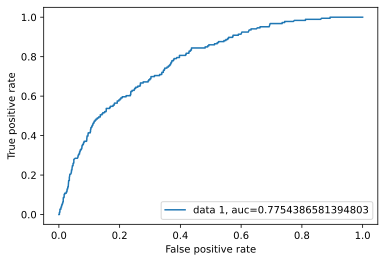

In [546]:


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0) #test_size = 0.30
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.coef_)
print(model.intercept_)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy_Score:",accuracy_score(y_test,y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
#print("Score:",model.score(X_test, y_test))

print(confusion_matrix(y_test,y_pred))


from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + repr(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

In [547]:
data['default_probability'] = 100.*model.predict_proba(X)[:, 1]
data.head()

,Country_Name,Country_code,Year,default_flag,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,default_probability
0,Afghanistan,AFG,1982,0,2.892346,12.3790,8.3500,-1.9000,13.6230,12.2330,1.184862,-2.031,174.236,-4.7325,-1.295321,23.956873
1,Afghanistan,AFG,1983,0,2.955046,12.0890,3.2235,2.0740,13.6230,13.7295,1.275887,-3.181,174.236,-5.9035,-1.340026,22.911988
2,Afghanistan,AFG,1984,0,2.904777,12.4555,0.9340,-0.6000,14.3115,17.8350,1.333387,-1.490,174.236,-5.4585,-1.369093,23.010671
3,Afghanistan,AFG,1985,0,2.897701,9.8775,-2.7000,1.9870,13.9545,16.5930,1.383322,-0.873,174.236,-4.4945,-1.360655,23.024844
4,Afghanistan,AFG,1986,0,2.841643,10.2650,-1.3370,3.2095,13.7180,17.6000,1.370402,-2.559,174.236,-3.0125,-1.378554,22.586505


In [548]:
df0 = data[data['Country_Name'] == 'United States']
df1 = data[data['Country_Name'] == 'Brazil']
df2 = data[data['Country_Name'] == 'Japan']
df3 = data[data['Country_Name'] == 'Australia']
df4 = data[data['Country_Name'] == 'Portugal']
df5 = data[data['Country_Name'] == 'Norway']
df6 = data[data['Country_Name'] == 'Sudan']
df7 = data[data['Country_Name'] == 'South Africa']


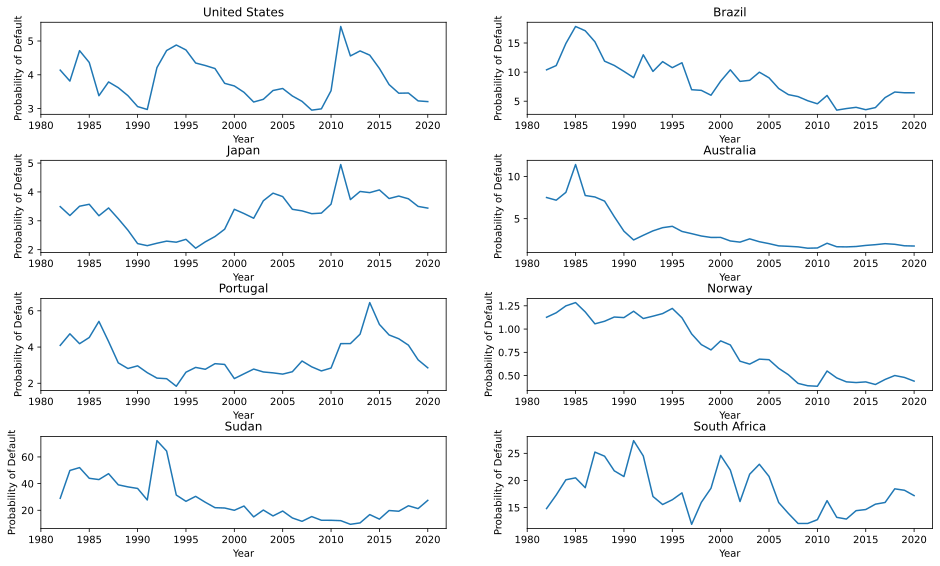

In [549]:
plt.subplots(4, 2, figsize=(16, 8), sharex=True) # I will Scale y-axis later


plt.rcParams.update({'font.size': 10})

plt.subplot(4, 2, 1)
plt.plot(df0['Year'], df0['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("United States")
plt.xlim(left=1980)
#plt.ylim(top=0.5)


plt.subplot(4, 2, 2)
plt.plot(df1['Year'], df1['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Brazil")
plt.xlim(left=1980)
#plt.ylim(top=20)


plt.subplot(4, 2, 3)
plt.plot(df2['Year'], df2['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Japan")
plt.xlim(left=1980)
#plt.ylim(top=0.5)


plt.subplot(4, 2, 4)
plt.plot(df3['Year'], df3['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Australia")
plt.xlim(left=1980)
#plt.ylim(top=1)


plt.subplot(4, 2, 5)
plt.plot(df4['Year'], df4['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Portugal")
plt.xlim(left=1980)
#plt.ylim(top=2)


plt.subplot(4, 2, 6)
plt.plot(df5['Year'], df5['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Norway")
plt.xlim(left=1980)
#plt.ylim(top=0.1)


plt.subplot(4, 2, 7)
plt.plot(df6['Year'], df6['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Sudan")
plt.xlim(left=1980)
#plt.ylim(top=0.5)


plt.subplot(4, 2, 8)
plt.plot(df7['Year'], df7['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("South Africa")
plt.xlim(left=1980)
#plt.ylim(top=0.5)


#plt.subplots_adjust(top=0.90, bottom=0.02, wspace=0.20, hspace=0.5)
plt.subplots_adjust(top=0.90, bottom=0.02, wspace=0.20, hspace=0.5)
#sns.set()    
plt.show()

In [550]:
np.random.normal(5, 0.3, 100)

array([5.6317122 , 5.37953605, 4.85113684, 5.34506044, 4.63230103,
       5.16698912, 4.72463554, 5.08370622, 4.84505926, 4.88061423,
       5.1900974 , 5.72298106, 4.90082186, 5.19779784, 5.2716859 ,
       5.34116291, 5.15701008, 5.12488822, 5.36220636, 5.0582079 ,
       5.4134316 , 4.97514342, 5.11170434, 5.08722762, 5.25523197,
       4.44225898, 5.20645079, 4.73002947, 4.77082041, 5.06206983,
       4.84445053, 4.90774468, 5.0574153 , 4.97195509, 4.78813469,
       4.97393041, 4.73258635, 4.96890205, 5.2068549 , 4.88819236,
       4.84168679, 4.63266651, 5.2043053 , 4.63494464, 4.78545314,
       5.12917866, 4.70430008, 5.11467881, 5.0102682 , 5.11100903,
       4.8636637 , 4.73578377, 5.20818928, 4.80487697, 5.29336679,
       5.35933749, 4.85965645, 5.08264868, 4.56860974, 4.85508   ,
       4.84014742, 5.55832133, 5.55773268, 5.13057626, 4.88408679,
       5.17505932, 5.13178934, 4.59652757, 5.03937439, 4.74087478,
       5.62784734, 5.08390415, 4.47777388, 5.34757827, 4.99855

# Naive Bayes

Accuracy: 0.8863086598935656
Precision: 0.23684210526315788
Recall: 0.23225806451612904
Accuracy_Score: 0.8863086598935656
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1912
           1       0.24      0.23      0.23       155

    accuracy                           0.89      2067
   macro avg       0.59      0.59      0.59      2067
weighted avg       0.89      0.89      0.89      2067

[[1796  116]
 [ 119   36]]


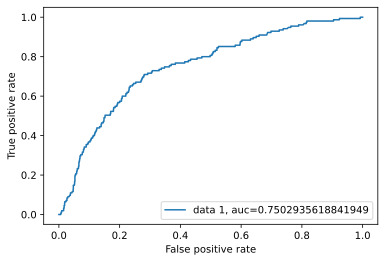

In [551]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import LogisticRegression

y = data['default_flag']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 1)
model = GaussianNB()
#model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy_Score:",accuracy_score(y_test,y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
#print("Score:",model.score(X_test, y_test))

print(confusion_matrix(y_test,y_pred))


from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + repr(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

In [552]:
data['default_probability'] = 100.*model.predict_proba(X)[:, 1]
data.head()

,Country_Name,Country_code,Year,default_flag,log_gdp_per_capita,annual_inflation,change_in_volume_of_imports,change_in_volume_of_exports,unemployment_rate,gov_revenue_per_GDP,log_gov_expenditure_per_GDP,gov_lending_minus_borrowing_per_GDP,gov_net_debt_per_GDP,exports_minus_imports_per_GDP,log10_share_world_GDP,default_probability
0,Afghanistan,AFG,1982,0,2.892346,12.3790,8.3500,-1.9000,13.6230,12.2330,1.184862,-2.031,174.236,-4.7325,-1.295321,76.094413
1,Afghanistan,AFG,1983,0,2.955046,12.0890,3.2235,2.0740,13.6230,13.7295,1.275887,-3.181,174.236,-5.9035,-1.340026,74.501747
2,Afghanistan,AFG,1984,0,2.904777,12.4555,0.9340,-0.6000,14.3115,17.8350,1.333387,-1.490,174.236,-5.4585,-1.369093,74.519483
3,Afghanistan,AFG,1985,0,2.897701,9.8775,-2.7000,1.9870,13.9545,16.5930,1.383322,-0.873,174.236,-4.4945,-1.360655,73.099962
4,Afghanistan,AFG,1986,0,2.841643,10.2650,-1.3370,3.2095,13.7180,17.6000,1.370402,-2.559,174.236,-3.0125,-1.378554,72.534066


In [553]:
df0 = data[data['Country_Name'] == 'United States']
df1 = data[data['Country_Name'] == 'Brazil']
df2 = data[data['Country_Name'] == 'Japan']
df3 = data[data['Country_Name'] == 'Australia']
df4 = data[data['Country_Name'] == 'Portugal']
df5 = data[data['Country_Name'] == 'Norway']
df6 = data[data['Country_Name'] == 'Sudan']
df7 = data[data['Country_Name'] == 'South Africa']

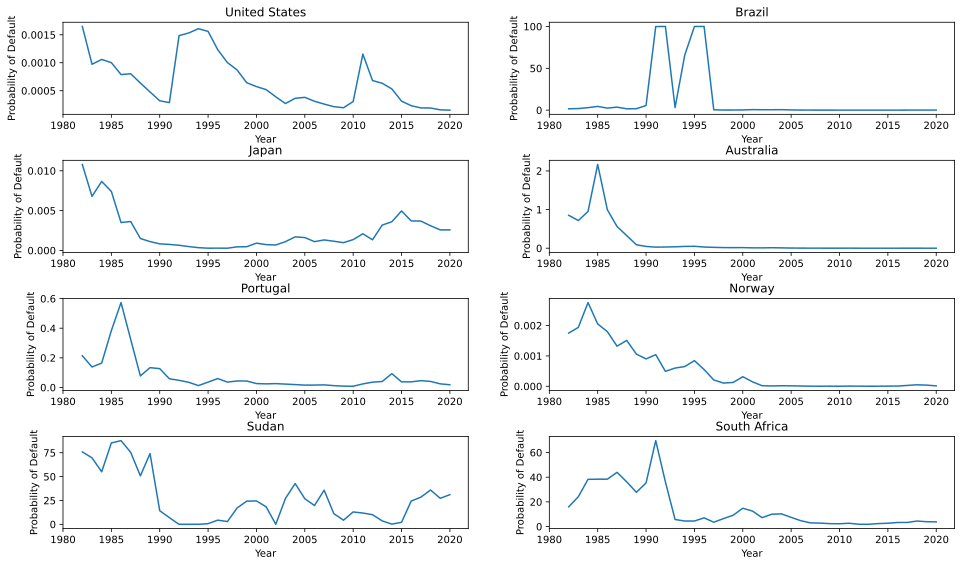

In [554]:
plt.subplots(4, 2, figsize=(16, 8), sharex=True) # I will Scale y-axis later


plt.rcParams.update({'font.size': 10})

plt.subplot(4, 2, 1)
plt.plot(df0['Year'], df0['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("United States")
plt.xlim(left=1980)
#plt.ylim(top=0.5)


plt.subplot(4, 2, 2)
plt.plot(df1['Year'], df1['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Brazil")
plt.xlim(left=1980)
#plt.ylim(top=20)


plt.subplot(4, 2, 3)
plt.plot(df2['Year'], df2['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Japan")
plt.xlim(left=1980)
#plt.ylim(top=0.5)


plt.subplot(4, 2, 4)
plt.plot(df3['Year'], df3['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Australia")
plt.xlim(left=1980)
#plt.ylim(top=1)


plt.subplot(4, 2, 5)
plt.plot(df4['Year'], df4['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Portugal")
plt.xlim(left=1980)
#plt.ylim(top=2)


plt.subplot(4, 2, 6)
plt.plot(df5['Year'], df5['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Norway")
plt.xlim(left=1980)
#plt.ylim(top=0.1)


plt.subplot(4, 2, 7)
plt.plot(df6['Year'], df6['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("Sudan")
plt.xlim(left=1980)
#plt.ylim(top=0.5)


plt.subplot(4, 2, 8)
plt.plot(df7['Year'], df7['default_probability'])
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.title("South Africa")
plt.xlim(left=1980)
#plt.ylim(top=0.5)


#plt.subplots_adjust(top=0.90, bottom=0.02, wspace=0.20, hspace=0.5)
plt.subplots_adjust(top=0.90, bottom=0.02, wspace=0.20, hspace=0.5)
#sns.set()    
plt.show()